In [1]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
import cv2


In [2]:
def display_image(patch):
    plt.figure(figsize = (6,6))
    plt.imshow(patch)
    plt.title("Patch Image")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

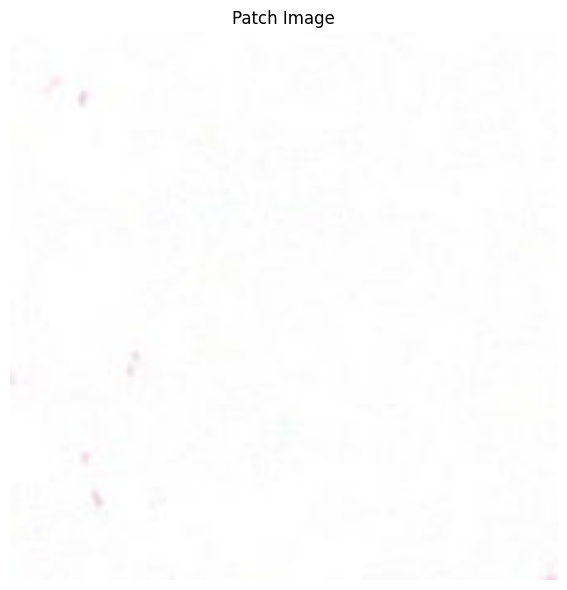

In [3]:
patch_file = "/home/duckhiem/Histopathology-Image-Processing/test_patches/patient_000_node_0_x7168_y2240.npy"
patch = np.load(patch_file)

display_image(patch)

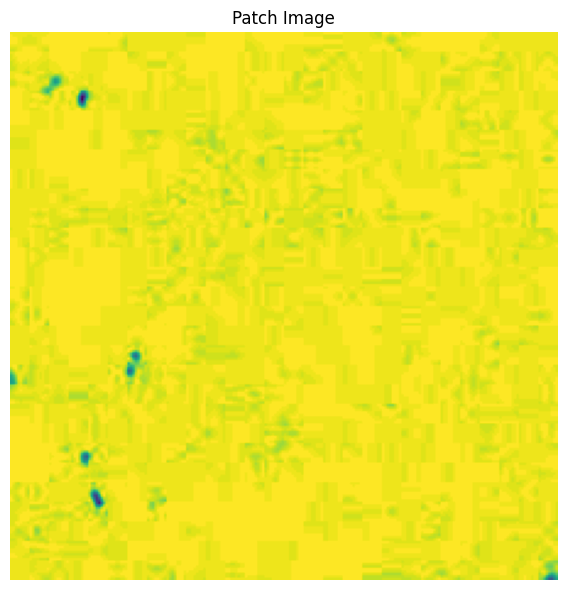

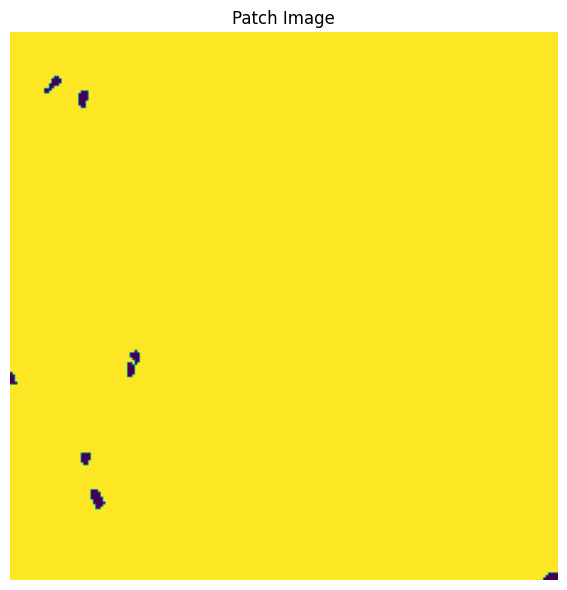

Tissue Ratio: 0.3540


In [4]:
gray = cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY)
display_image(gray)
_, thres_img = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
display_image(thres_img)
tissue_ratio = np.mean(gray == 255) 
print(f"Tissue Ratio: {tissue_ratio:.4f}")

In [6]:
"""Import modules required to run the Jupyter notebook."""

from __future__ import annotations

from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import requests

from tiatoolbox.tools.tissuemask import MorphologicalMasker
from tiatoolbox.utils import imwrite
from tiatoolbox.wsicore.wsireader import WSIReader

mpl.rcParams["figure.dpi"] = 150  # for high resolution figure in notebook

|2025-10-27|11:17:20.642| [WARNING] /home/duckhiem/miniconda3/envs/histo/lib/python3.9/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.8 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()



In [7]:
data_dir = "./tmp"
sample_file_name = "sample_wsi_small.svs"
sample_thumbnail_name = "sample_wsi_small_thumbnail.jpg"
sample_mask_name = "sample_wsi_small_mask.png"

user_sample_wsi_path = None
if user_sample_wsi_path is None:
    sample_wsi_path = f"{data_dir}/{sample_file_name}"
else:
    sample_wsi_path = user_sample_wsi_path
if not Path(sample_wsi_path).exists():
    Path(data_dir).mkdir()
    r = requests.get(
        "https://tiatoolbox.dcs.warwick.ac.uk/sample_wsis/CMU-1-Small-Region.svs",
        timeout=60,  # 60s
    )
    with Path(sample_wsi_path).open("wb") as f:
        f.write(r.content)

sample_thumbnail_path = f"{data_dir}/{sample_thumbnail_name}"
sample_mask_path = f"{data_dir}/{sample_mask_name}"

In [8]:
wsi= WSIReader.open(input_img = sample_wsi_path)
print(type(wsi))

<class 'tiatoolbox.wsicore.wsireader.OpenSlideWSIReader'>


In [9]:
wsi_info = wsi.info.as_dict()

print(*list(wsi_info.items()), sep="\n")

('objective_power', 20.0)
('slide_dimensions', (2220, 2967))
('level_count', 1)
('level_dimensions', ((2220, 2967),))
('level_downsamples', [1.0])
('vendor', 'aperio')
('mpp', (0.499, 0.499))
('file_path', PosixPath('tmp/sample_wsi_small.svs'))
('axes', 'YXS')


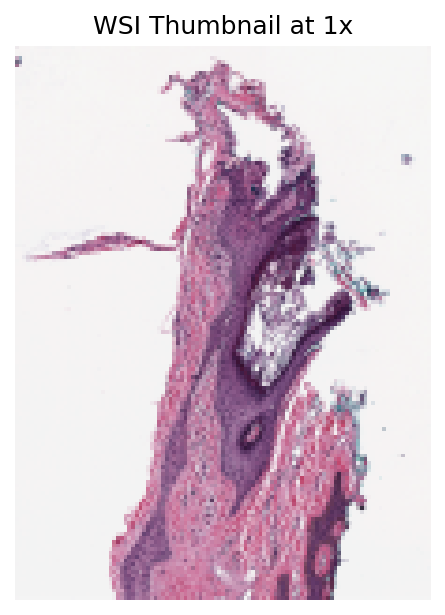

In [10]:
wsi_thumb = wsi.slide_thumbnail(resolution=1, units = "power")
plt.imshow(wsi_thumb)
plt.axis("off")
plt.title("WSI Thumbnail at 1x")
plt.show()

In [15]:
mask = wsi.tissue_mask(resolution = 1, units = "power")
print(mask)

In [17]:
def show_side2side(img1,img2):
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.axis("off")
    plt.show()

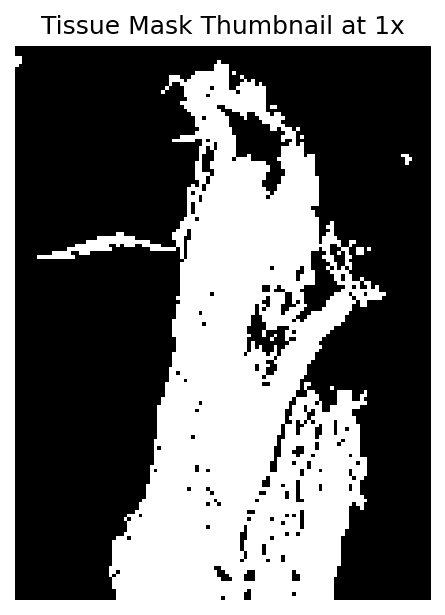

In [16]:
mask_thumb = mask.slide_thumbnail(resolution=1, units="power")
plt.imshow(mask_thumb, cmap="gray")
plt.axis("off")
plt.title("Tissue Mask Thumbnail at 1x")
plt.show()

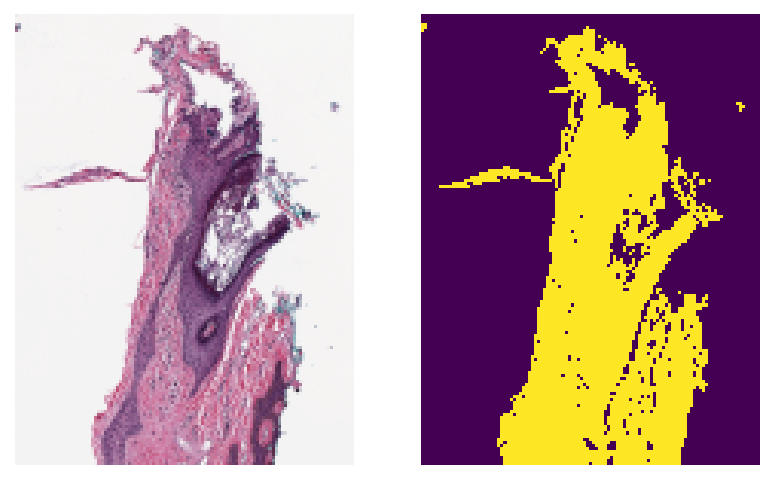

In [18]:
show_side2side(wsi_thumb, mask_thumb)